<a href="https://colab.research.google.com/github/nirjhor123/Day-and-Night-in-Village-LIfe-Computer-Graphics-Project-/blob/master/Day_and_Night_in_Village_Life(Computer_Graphics_Project)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q lucid>=0.2.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
tifffile 2022.10.10 requires numpy>=1.19.2, but you have numpy 1.19.0 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.19.0 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [2]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [3]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)



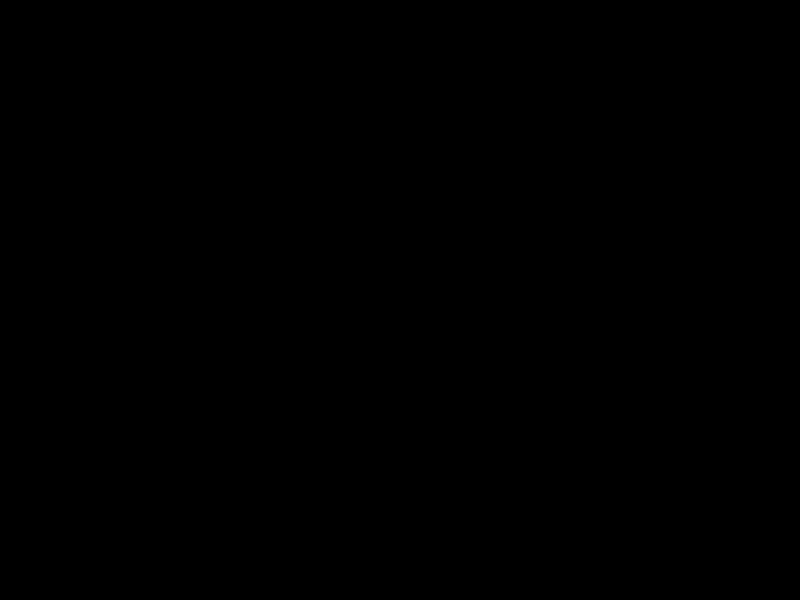

In [4]:
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

In [5]:
#mippointline
import math
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
def writepixel(x,y):
  gl.glPointSize(5)
  #gl.glBegin(gl.GL_POINTS)
  gl.glBegin(gl.GL_POINTS)
  gl.glColor3f(r,g,b)
  gl.glVertex2f(x/1000,y/1000)
  gl.glEnd()
  #print(x,y)
def converttooriginalzone(zone,x,y):
  if(zone==0):
    return x,y
  if(zone==1):
    return y,x
  if(zone==2):
    return -y,x
  if(zone==3):
    return -x,y
  if(zone==4):
    return -x,-y
  if(zone==5):
    return -y,-x
  if(zone==6):
    return y,-x
  if(zone==7):
    return x,-y
def midpointlinealgorithom(x1,y1,x2,y2,zone):
  #print(x1,y1,x2,y2)
  dx=x2-x1
  dy=y2-y1
  d=(2*dy)-dx
  de=2*dy
  dne=2*(dy-dx)
  x=x1
  y=y1
 
  for x in range(x1,x2+1):
    #print("d ",d)
    if(d>0):
         d+=dne
         y=y+1
    else:
         d+=de
    x3,y3=converttooriginalzone(zone,x,y)
    
    writepixel(x3,y3)
def zonefinder(x1,y1,x2,y2):
  dxz=abs(x1-x2)
  dyz=abs(y1-y2)
  dxz1=(x2-x1)
  dyz1=(y2-y1)
  if(dxz>dyz):
    if dxz1>=0 and dyz1>=0:
      return 0
    elif dxz1>=0 and dyz1<=0:
      return 7
    elif dxz1<=0 and dyz1<=0:
      return 4
    elif dxz1<=0 and dyz1>=0:
      return 3
  else:
    if dxz1>=0 and dyz1>=0:
      return 1
    elif dxz1>=0 and dyz1<=0:
      return 6
    elif dxz1<=0 and dyz1<=0:
      return 5
    elif dxz1<=0 and dyz1>=0:
      return 2
def converttozonezero(zone,x1,y1):
  if(zone==0):
    return x1,y1
  if(zone==1):
    return y1,x1
  if(zone==2):
    return y1,-x1
  if(zone==3):
    return -x1,y1
  if(zone==4):
    return -x1,-y1
  if(zone==5):
    return -y1,-x1
  if(zone==6):
    return -y1,x1
  if(zone==7):
    return x1,-y1
def lineDrawing(x1,y1,x2,y2):
  zone=zonefinder(x1,y1,x2,y2)
  
  if(zonefinder(x1,y1,x2,y2)!=0):
    x1,y1=converttozonezero(zone,x1,y1)
    x2,y2=converttozonezero(zone,x2,y2)
  
  midpointlinealgorithom(x1,y1,x2,y2,zone)

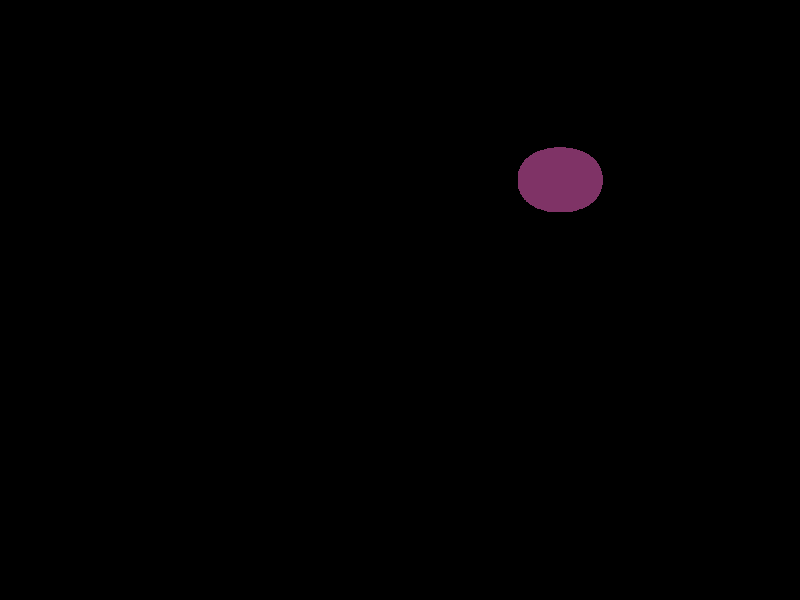

In [6]:

import math
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
def draw_points(x, y,newx,newy):
  gl.glPointSize(5)
  
  gl.glBegin(gl.GL_POINTS)
  gl.glColor3f(r,g,b)
  gl.glVertex2f(x/1000,y/1000)
  gl.glEnd()
  lineDrawing(newx,newy,x,y)

def eightway(x,y,newx,newy):
      draw_points(x+newx,y+newy,newx,newy)
      draw_points(y + newx, x + newy,newx,newy)
      draw_points(-x + newx, y + newy,newx,newy)
      draw_points(-y + newx, x + newy,newx,newy)
      draw_points(x + newx, -y + newy,newx,newy)
      draw_points(y + newx, -x + newy,newx,newy)
      draw_points(-x + newx, -y + newy,newx,newy)
      draw_points(-y + newx, -x + newy,newx,newy)
def maincircle(x,y,radius):

    
    midpointcircle(x,y,radius)
  
def midpointcircle(newx,newy,r):
  d=1-r
  x=0
  y=r
  eightway(x,y,newx,newy)
  while(True):
    if(x>y):
        break
    #eightway(x,y,newx,newy)
    if(d>=0):

      d=d+2*x-2*y+5
      x = x + 1  # south
      y = y - 1
    else:
      #x=x+1                      #east
      d=d+2*x+3
      x = x + 1
    eightway(x, y, newx, newy)
center_1=400
center_2=400
radius=100
r=0.5
g=0.2
b=0.4
maincircle(center_1,center_2,radius)
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

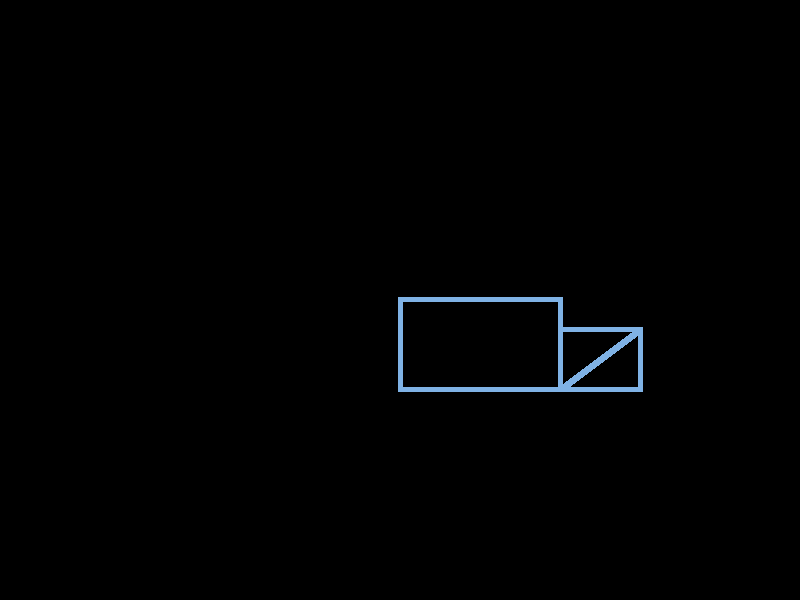

In [7]:
import math
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
def writepixel(x,y):
  gl.glPointSize(5)
  
  gl.glBegin(gl.GL_POINTS)
  gl.glColor3f(r,g,b)
  gl.glVertex2f(x/1000,y/1000)
  gl.glEnd()
  
def converttooriginalzone(zone,x,y):
  if(zone==0):
    return x,y
  if(zone==1):
    return y,x
  if(zone==2):
    return -y,x
  if(zone==3):
    return -x,y
  if(zone==4):
    return -x,-y
  if(zone==5):
    return -y,-x
  if(zone==6):
    return y,-x
  if(zone==7):
    return x,-y
def midpointlinealgorithom(x1,y1,x2,y2,zone):
  
  dx=x2-x1
  dy=y2-y1
  d=(2*dy)-dx
  de=2*dy
  dne=2*(dy-dx)
  x=x1
  y=y1
 
  for x in range(x1,x2+1):
    
    if(d>0):
         d+=dne
         y=y+1
    else:
         d+=de
    x3,y3=converttooriginalzone(zone,x,y)
    
    writepixel(x3,y3)
def zonefinder(x1,y1,x2,y2):
  dxz=abs(x1-x2)
  dyz=abs(y1-y2)
  dxz1=(x2-x1)
  dyz1=(y2-y1)
  if(dxz>dyz):
    if dxz1>=0 and dyz1>=0:
      return 0
    elif dxz1>=0 and dyz1<=0:
      return 7
    elif dxz1<=0 and dyz1<=0:
      return 4
    elif dxz1<=0 and dyz1>=0:
      return 3
  else:
    if dxz1>=0 and dyz1>=0:
      return 1
    elif dxz1>=0 and dyz1<=0:
      return 6
    elif dxz1<=0 and dyz1<=0:
      return 5
    elif dxz1<=0 and dyz1>=0:
      return 2
def converttozonezero(zone,x1,y1):
  if(zone==0):
    return x1,y1
  if(zone==1):
    return y1,x1
  if(zone==2):
    return y1,-x1
  if(zone==3):
    return -x1,y1
  if(zone==4):
    return -x1,-y1
  if(zone==5):
    return -y1,-x1
  if(zone==6):
    return -y1,x1
  if(zone==7):
    return x1,-y1
def lineDrawing(x1,y1,x2,y2):
  zone=zonefinder(x1,y1,x2,y2)
  
  if(zonefinder(x1,y1,x2,y2)!=0):
    x1,y1=converttozonezero(zone,x1,y1)
    x2,y2=converttozonezero(zone,x2,y2)
  
  midpointlinealgorithom(x1,y1,x2,y2,zone)
r,g,b=0.5,0.7,0.9
lineDrawing(0,-300,400,-300)
lineDrawing(0,-300,0,0)
lineDrawing(0,-0,400,0)
lineDrawing(400,-300,400,0)
lineDrawing(400,-100,600,-100)
lineDrawing(400,-300,600,-300)
lineDrawing(400,-300,400,-100)
lineDrawing(600,-300,600,-100)
#maincircle(-0,-400,100)
#maincircle(400,-400,100)
lineDrawing(400,-300,600,-100)
lineDrawing(600,-300,600,-100)
lineDrawing(600,-300,600,-100)
lineDrawing(600,-300,600,-100)
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

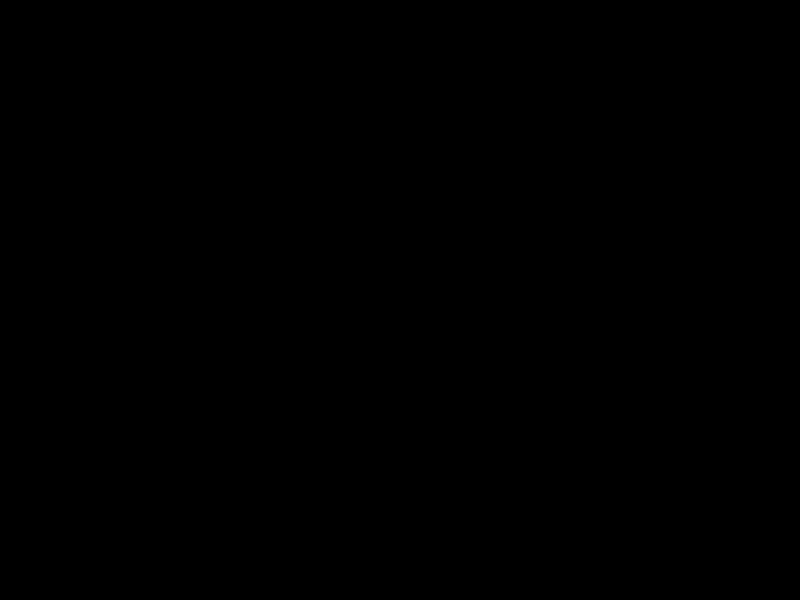

In [8]:
#gl.glClearColor(135/1000,206/1000,235/1000,0)
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

def rotation(house_start,house_end,house_height_start,house_height_end):
  
  

  #lineDrawing(house_start-100,house_height_end-100,house_end-100,house_height_end)
  lineDrawing(house_end,house_height_start,house_end-100,house_height_end)                 #side line
  lineDrawing(house_start,-house_height_start,house_start-100,house_height_end)
  lineDrawing(house_start-100,house_height_end,house_end-100,house_height_end)
  lineDrawing(house_start-100,house_height_end,int(((house_start)+house_end)/2),house_height_end-100)          #traingle 
  lineDrawing(house_end-100,house_height_end,int((house_start+house_end)/2),house_height_end-100)
  for i in range(house_start,house_end-100):
      r,g,b=84/250,82/250,82/250
      lineDrawing(i,house_height_start,i,house_height_end)
     
  
  r=0.255
  g=0.255
  b=0


#tree
def tree_height_draw(tree_height,tree_start,tree_end):
       
       
       lineDrawing(tree_start,0,tree_start,tree_height)
       print(tree_height)
       lineDrawing(tree_end,0,tree_end,tree_height)
#tree height
       for i in range(tree_start,tree_end):
             lineDrawing(i,0,i,tree_height)
  #tree structure
def tree_upper(tree_height,tree_start,tree_end):
       #r,g,b=0,0.5,0
       r=0
       g=0.5
       b=0.0
       radius=100
       upper_center_1=tree_start+50
       upper_center_2=tree_height+100
       maincircle(upper_center_1,upper_center_2,radius)
    
#tree er left
#def tree_left(left_center_1,left_center_2,radius):
       radius=100
       left_center_1=tree_start
       left_center_2=tree_height+100
#while(radius>=0):
       midpointcircle(left_center_1,left_center_2,radius)
 #    radius=radius-1
#tree er right
#def tree_right(right_center_1,right_center_2,radius):
       radius=100
       right_center_1=tree_end
       right_center_2=tree_height+100
#while(radius>=0):
       midpointcircle(right_center_1,right_center_2,radius)
#radius=radius-1
#uporer circle
#def upper_circle(up_center_1,up_center_2,radius):
       radius=100
       up_center_1=tree_start+50
       up_center_2=tree_height+200
#while(radius>=0):
       midpointcircle(up_center_1,up_center_2,radius)
#     radius=radius-1
#back_line
#sky
#left
#sun
def tree_upper_special(tree_height,tree_start,tree_end):
       #r,g,b=0,0.5,0
       r=0
       g=0.5
       b=0.0
       radius=100
       upper_center_1=tree_start+50
       upper_center_2=tree_height-100
       maincircle(upper_center_1,upper_center_2,radius)
    
#tree er left
#def tree_left(left_center_1,left_center_2,radius):
       radius=100
       left_center_1=tree_start
       left_center_2=tree_height-100
       midpointcircle(left_center_1,left_center_2,radius)
 
#tree er right
       radius=100
       right_center_1=tree_end
       right_center_2=tree_height-100
       midpointcircle(right_center_1,right_center_2,radius)

#uporer circle
       radius=100
       up_center_1=tree_start+50
       up_center_2=tree_height-200
       midpointcircle(up_center_1,up_center_2,radius)
r,g,b=0.7,0.5,0.9
def sun_drawing(sun_center_1,sun_center_2,radius):
          radius=100
          sun=midpointcircle(sun_center_1,sun_center_2,radius)
#field

def green_field(field_start,field_end,field_height_start,field_height_end):

      for i in range(field_start,field_end):
               lineDrawing(i,field_height_start,i,field_height_end)

r=0
g=0.181
b=0.226
def river(river_start,river_end,river_height_start,river_height_end):
     for i in range(river_start,river_end):
                lineDrawing(i,river_height_start,i,river_height_end)
def special_river(river_start,river_end,river_height_start,river_height_end):
     r=227/250
     g=120/250
     g=20/250
     for i in range(river_start,river_end):
                lineDrawing(i,river_height_start,i,int(river_height_end/2))
     r=0
     g=0.181
     b=0.226
     for i in range(river_start,river_end):
                lineDrawing(i,int(river_height_end/2),i,river_height_end)
def house(house_start,house_end,house_height_start,house_height_end):
  lineDrawing(house_start,house_height_end,house_end,house_height_end)
  lineDrawing(house_end,house_height_start,house_end,house_height_end)
  lineDrawing(house_start,-house_height_start,house_start,house_height_end)
  lineDrawing(house_start,house_height_end,house_end,house_height_end)
  #lineDrawing(house_start,house_height_end,int((house_start+house_end)/2),house_height_end+100)          #traingle 
 # lineDrawing(house_end,house_height_end,int((house_start+house_end)/2),house_height_end+100)
  
  r=0.255
  g=0.255
  b=0
def house_colour(house_start,house_end,house_height_start,house_height_end):
  for i in range(house_start,house_end):
                lineDrawing(i,house_height_start,i,house_height_end)
  
  #for colouring the house

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

12
2
0.7853981633974483
100 700
0.792 0.988 0.968
400
[[-600    0]
 [   0  600]]
600
-600 -200


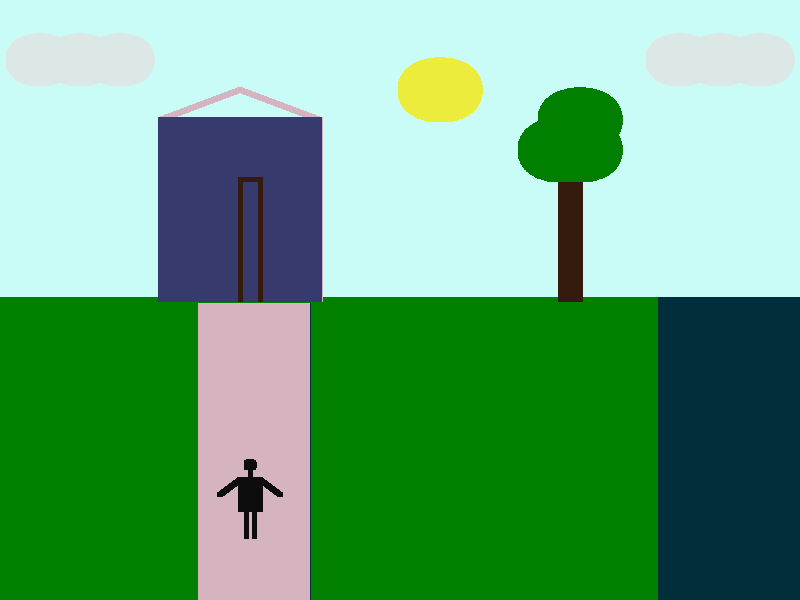

In [14]:

time= int(input())   #input must be between 5 and 19
tx= int(input())#tree er height multiply  should be 1 or 2 or 3[for night its better to not exceed 3]






r,g,b=0.7,0.5,0.9
sun_center_1,sun_center_2=100,0                 #sun details
theta=math.radians(45)
print(theta)

if(6<=time<=19):
         
         if(time==5):
           r,g,b=143/250,194/250,194/250 
         if(time>=6 and time<16):
           
           sun_theta=np.array([[1,0],[((time-5)*100)/sun_center_1,1]])        #offset add sun rise
           sun_center=np.array([sun_center_1,sun_center_2])
           sun_1=np.dot(sun_theta,sun_center)                #theta er calculation
           sun_center_1=int(sun_1[0])
           sun_center_2=int(sun_1[1])
           
           print(sun_center_1,sun_center_2)
           
           
           if(time>=5 and time<=7):
              r,g,b=188/250, 211/250, 214/250              #sky colour change depending on time
           if(time>7 and time<=12):
             
             r=198/250
             g=247/250
             b=242/250
           if(time>12 and time<=15):
              r,g,b=52/250, 235/250, 216/250
           
         elif(time>=16 and time<=17):
           if(time==16):
                sun_theta=np.array([[1,0],[((time-10)*100)/sun_center_1,1]])        #offset add sun rise
                r,g,b=66/250, 135/250, 245/250
           if(time==17):
                sun_theta=np.array([[1,0],[((time-14)*100)/sun_center_1,1]])
                r,g,b=40/250, 45/250, 56/250 
         
           
           sun_center=np.array([sun_center_1,sun_center_2])
           sun_1=np.dot(sun_theta,sun_center)                #theta er calculation
           sun_center_1=int(sun_1[0])
           sun_center_2=int(sun_1[1])
           
         else:
           if(time==18 or time==19):
             r,g,b=193/250, 194/250, 188/250
           if(time==18):
              theta=(time-15)*theta
           elif(time==19):                                 #at 3pm meaning 16 sun is at the highest position
              theta=(time-15)*theta
           else:

              theta=(time-5)*theta
           
           sun_theta=np.array([[math.cos(theta),-math.sin(theta)],[math.sin(theta),math.cos(theta)]])
           sun_center=np.array([sun_center_1,sun_center_2])
           sun_1=np.dot(sun_theta,sun_center)                #theta er calculation
           sun_center_1=int(sun_1[0])
           sun_center_2=int(sun_1[1])
           print(sun_center_1,sun_center_2)
           print("sun_1")
           
           print(sun_theta,sun_center,sun_1)
        
         
         print(r,g,b)
         gl.glClearColor(r,g,b,0)
         gl.glClear(gl.GL_COLOR_BUFFER_BIT)
         if(time>=6 and time<=8):
           r,g,b=235/250, 240/250, 101/250
         if(time>=9 and time<=13):
           r,g,b=230/250,231/250,59/250
         if(time>=14 and time<=15):
           r,g,b=229/250,212/250,43/250
         if(time==16):
           r,g,b=212/250,169/250,35/250
         if(time==17):
           r,g,b=231/250,153/250,32/250
         if(time==18):
           r,g,b=252/250, 98/250, 3/250 
         sun_drawing(sun_center_1,sun_center_2,100)   
         r=0.205
         g=0.107
         b=0.050
                #only circle to draw the sun all the other form of sun come from rotation and translation
         field_start=-1000
         field_end=650
         field_height_start=0
         field_height_end=-1000
         r=0
         g=0.5
         b=0.0
         green_field(field_start,field_end,field_height_start,field_height_end)


         tree_height=200
         tree_start=400                                  #details of tree
         tree_end=450
         if(time==17 or time==18):
               tree_height=200
               tree_start=400                                  #details of tree
               tree_end=450
               tree_height_1=np.array([[tree_start,0],[0,-tree_height]])
               tree_scaling_1=np.array([[1,0],[0,tx]])                       #tree er scaling
                                                             #new tree er left

               new_tree_1=np.dot(tree_height_1,tree_scaling_1)
                                              #tree reflection
               tree_height=new_tree_1[1][1]
        
               r,g,b=46/250, 45/250, 45/250
               print("tree_height reverse",str(tree_height))
               tree_height_draw(tree_height,tree_start,tree_end)
               tree_upper_special(tree_height,tree_start,tree_end)         
         #else:
         r=0.205
         g=0.107
         b=0.050
         tree_height=200
         tree_start=400                                  #details of tree
         tree_end=450    
         tree_height_1=np.array([[tree_start,0],[0,tree_height]])
         tree_scaling_1=np.array([[1,0],[0,tx]])                       #tree er scaling
         #print(tree_height_1.ndim)                             #new tree er left
         #print(tree_scaling_1.ndim)   
         new_tree_1=np.dot(tree_height_1,tree_scaling_1)
         #print(new_tree_1)
         tree_height=new_tree_1[1][1]
        # print(tree_height)
       # if(time>=17 and time<=18):
         tree_height_draw(tree_height,tree_start,tree_end)
         r=0
         g=0.5
         b=0.0
         tree_upper(tree_height,tree_start,tree_end)            #tree er structure   
         river_start=650
         river_end=1000
         river_height_start=0
         river_height_end=-1000
         r=0
         g=0.181
         b=0.226
         if(time>=17 and time<=18):
            r=0
            g=0.181
            b=0.226
            river(river_start,river_end,river_height_start,river_height_end)
            

            r,g,b=235/250,140/250,52/250
            end=950
            end_y_start=950
            end_y_end=0
            for i in range(750,850,30):
              lineDrawing(i,end_y_end,end_y_start,end_y_end)
              end_y_start=end_y_start-30
              end_y_end=end_y_end-10
            
         else:
             river(river_start,river_end,river_height_start,river_height_end)
          #road
         house_start=-600                          #variables for house
         house_end=-200
         house_height_start=0
         house_height_end=300
         road_start=house_start+100
         road_end=house_end-30
         road_height_start=house_height_start-20
         road_height_end=-1000
         

         lineDrawing(road_start,road_height_start,road_start,road_height_end)
         lineDrawing(road_end,road_height_start,road_end,road_height_end)
         for i in range(road_start,road_end):
            r, g, b = 209/250, 176/250, 187/250 
            lineDrawing(i,road_height_start,i,road_height_end)
         #House
        
         house_height_1=np.array([[house_start,0],[0,house_height_end]])
         house_scaling_1=np.array([[1,0],[0,tx]])            
         #print(tree_height_1.ndim)                             #new tree er left
         #print(tree_scaling_1.ndim)   
         new_house_1=np.dot(house_height_1,house_scaling_1)
         print(new_house_1)
         house_height_end=new_house_1[1][1]
         print(house_height_end)
         house(house_start,house_end,house_height_start,house_height_end)
         lineDrawing(house_start,house_height_end,int((house_start+house_end)/2),house_height_end+100)          #traingle 
         lineDrawing(house_end,house_height_end,int((house_start+house_end)/2),house_height_end+100)
         
      
         #Shadow House
         #house_height_endShadow =
         a=house_start
         b_=house_end
         c=house_height_start
         d=-house_height_end
         if(17<= time <=18):
            r,g,b=84/250,82/250,82/250
            rotation(a, b_, c, d)
            print(a,b_,c,d)
            gl.glBegin(gl.GL_TRIANGLES)
            gl.glColor3f(84/250,82/250,82/250 )
            gl.glVertex2f((a-100)/1000,(d)/1000)
            gl.glVertex2f((a)/1000,(d)/1000)
            gl.glVertex2f((a)/1000,(c)/1000)
            gl.glEnd()
            gl.glBegin(gl.GL_TRIANGLES)
            gl.glColor3f(84/250,82/250,82/250 )
            gl.glVertex2f((b_-100)/1000,(c)/1000)
            gl.glVertex2f((b_-100)/1000,(d)/1000)
            gl.glVertex2f((b_)/1000,(c)/1000)
            gl.glEnd()
            gl.glBegin(gl.GL_TRIANGLES)
            gl.glColor3f(84/250,82/250,82/250 )
            gl.glVertex2f((a-100)/1000,(d)/1000)
            gl.glVertex2f((b_-100)/1000,(d)/1000)
            gl.glVertex2f((int((a+b_)/2))/1000,(d-100)/1000)
            gl.glEnd()
         r=255/250
         g=255/250
         b=0
         print(house_start,house_end)
         house_colour(house_start,house_end,house_height_start,house_height_end)
         r=54/250
         g=57/250
         b=107/250
         for i in range(house_start,house_end):
                #print("a")
                lineDrawing(i,house_height_start,i,house_height_end)
         #door 
         r=0.205
         g=0.107
         b=0.050
         lineDrawing(house_start+200,house_height_start,house_start+200,house_height_end-200)
         lineDrawing(house_start+200,house_height_end-200,house_start+250,house_height_end-200)
         lineDrawing(house_start+250,house_height_start,house_start+250,house_height_end-200)
         #sky
         r=216/250
         g=227/250
         b=226/250
         maincircle(-800,800,80)
         maincircle(-700,800,80)
         maincircle(-900,800,80)
         

         #sky2
         maincircle(800,800,80)
         maincircle(700,800,80)
         maincircle(900,800,80)
       

        # man
         r=13/250
         g=13/250
         b=13/250
         man_start=road_start+100
         man_end=road_start+150
         man_height_start=-800
         man_height_end=-900
         if(tx==2):
           man_height_start=man_height_start+200
           man_height_end=man_height_end+200
         if(tx==3):
           man_height_start=man_height_start+500
           man_height_end=man_height_end+500
         #box
         lineDrawing(man_start,man_height_start,man_start,man_height_end)
         lineDrawing(man_end,man_height_start,man_end,man_height_end)
         lineDrawing(man_start,man_height_start,man_end,man_height_start)
         lineDrawing(man_start,man_height_end,man_end,man_height_end)
         for i in range(man_start,man_end):
           #lineDrawing()
           
           lineDrawing(i,man_height_start,i,man_height_end)
         #man circle

         maincircle(man_start+25,man_height_end+150,10)
        # writepixel(man_start+50,man_height_end+100)

        #manush er head to body
        
         lineDrawing(man_start+25,man_height_end+140,man_start+25,man_height_start)

         #hand
         lineDrawing(man_start,man_height_start,man_start-50,man_height_end+50)
         lineDrawing(man_end,man_height_start,man_end+50,man_height_end+50)

         #leg
         lineDrawing(man_start+15,man_height_end,man_start+15,man_height_end-90)
         lineDrawing(man_start+35,man_height_end,man_start+35,man_height_end-90)
        
if(20<=time or time<=5):
         #tree
         gl.glClearColor(77/250,81/250,87/250,0)
         gl.glClear(gl.GL_COLOR_BUFFER_BIT)

         r=0.205
         g=0.107
         b=0.050
         tree_height=200
         tree_start=400                                  #details of tree
         tree_end=450    
         tree_height_1=np.array([[tree_start,0],[0,tree_height]])
         tree_scaling_1=np.array([[1,0],[0,tx]])                       #tree er scaling
         #print(tree_height_1.ndim)                             #new tree er left
         #print(tree_scaling_1.ndim)   
         new_tree_1=np.dot(tree_height_1,tree_scaling_1)
         #print(new_tree_1)
         tree_height=new_tree_1[1][1]
        # print(tree_height)
       # if(time>=17 and time<=18):
         tree_height_draw(tree_height,tree_start,tree_end)
         r=0
         g=0.5
         b=0.0
         tree_upper(tree_height,tree_start,tree_end)            #tree er structure
         moon_radius_1=800
         moon_radius_2=800
         r=227/250
         g=222/250
         b=209/250
         
         maincircle(moon_radius_1,moon_radius_2,100)
         
         
                    #only circle to draw the sun all the other form of sun come from rotation and translation
         field_start=-1000
         field_end=650
         field_height_start=0
         field_height_end=-1000
         r=0
         g=0.5
         b=0.0
         green_field(field_start,field_end,field_height_start,field_height_end)
         river_start=650
         river_end=1000
         river_height_start=0
         river_height_end=-1000
         r=0
         g=0.181
         b=0.226
         river(river_start,river_end,river_height_start,river_height_end)
         house_start=-600
         house_end=-200
         house_height_start=0
         house_height_end=300
         house_height_1=np.array([[house_start,0],[0,house_height_end]])
         house_scaling_1=np.array([[1,0],[0,tx]])            
         #print(tree_height_1.ndim)                             #new tree er left
         #print(tree_scaling_1.ndim)   
         new_house_1=np.dot(house_height_1,house_scaling_1)
         #print(new_house_1)
         house_height_end=new_house_1[1][1]
         #print(house_height_end)
         house(house_start,house_end,house_height_start,house_height_end)
         lineDrawing(house_start,house_height_end,int((house_start+house_end)/2),house_height_end+100)          #traingle 
         lineDrawing(house_end,house_height_end,int((house_start+house_end)/2),house_height_end+100)
         r=54/250
         g=57/250
         b=107/250
         #print(house_start,house_end)
         house_colour(house_start,house_end,house_height_start,house_height_end)
         for i in range(house_start,house_end):
                #print("a")
                lineDrawing(i,house_height_start,i,house_height_end)
          #door 
         
         r=0.205
         g=0.107
         b=0.050
         lineDrawing(house_start+200,house_height_start,house_start+200,house_height_end-200)
         lineDrawing(house_start+200,house_height_end-200,house_start+250,house_height_end-200)
         lineDrawing(house_start+250,house_height_start,house_start+250,house_height_end-200)
         #sky
         r,g,b=135/250,206/250,235/250
         maincircle(-800,800,80)
         maincircle(-700,800,80)
         maincircle(-900,800,80)
          #road

         road_start=house_start+100
         road_end=house_end-30
         road_height_start=house_height_start-20
         road_height_end=-1000


         lineDrawing(road_start,road_height_start,road_start,road_height_end)
         lineDrawing(road_end,road_height_start,road_end,road_height_end)
         for i in range(road_start,road_end):
            r, g, b = 209/250, 176/250, 187/250 
            lineDrawing(i,road_height_start,i,road_height_end)

          #star
         writepixel(-300,800)
         writepixel(950,800)
         writepixel(600,800)
         writepixel(-600,800)
         writepixel(-700,600)
         writepixel(300,600)
         writepixel(600,600)
         writepixel(-900,600)
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

In [10]:
#house_start, house_height_start
#house_start-100, house_height_end
#house_start, house_height_end